# Image Processing Lab 2  
Dr. Amr Amin  
Ahmed Alqassas    
Autumn 2024-25

# Review
**Sampling affects spatial resolution** by determining the density of pixels and, consequently, the level of detail captured in the image.  
**Quantization affects intensity resolution** by determining how many different intensity values can be represented, impacting the image's tonal richness.  
**Aliasing** Occurs when the sampling rate is too low to capture the detail in the image, leading to distortion.  
**Quantization Error** is the difference between the actual continuous intensity and the quantized value.

# Histograms
An image histogram is a graphical representation that shows the distribution of pixel intensity values in an image.

# **Hands-on** Creating and Interpreting Histogram


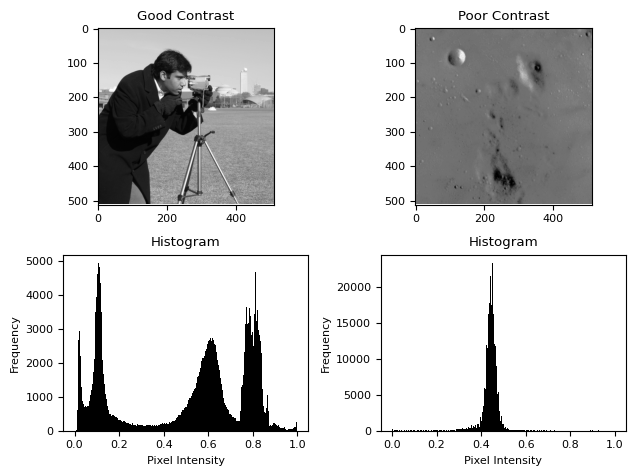

In [68]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float, io


matplotlib.rcParams['font.size'] = 8

# Load the images
img1 = data.camera() # Good Contrast
img2 = data.moon() # Low Contrast

# Conver the image to float64
gray_image = img_as_float(img1)
gray_image_low_contrast = img_as_float(img2)


# Plotting
figure, ax = plt.subplots(2, 2)

# Plot first Image
ax[0, 0].imshow(gray_image, cmap='gray')
ax[0, 0].set_title('Good Contrast')

# Plot second Image
ax[0, 1].imshow(gray_image_low_contrast, cmap='gray', )
ax[0, 1].set_title('Poor Contrast')

# Plot second histogram
ax[1, 0].hist(gray_image.ravel(), bins= 256, color='black')
ax[1, 0].set_title('Histogram')
ax[1, 0].set_xlabel('Pixel Intensity')
ax[1, 0].set_ylabel('Frequency')

# Plot second histogram
ax[1, 1].hist(gray_image_low_contrast.ravel(), bins= 256, range=(0, 1), color='black')
ax[1, 1].set_title('Histogram')
ax[1, 1].set_xlabel('Pixel Intensity')
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].set_xlim()

figure.tight_layout()
plt.show()

## Interpret the histogram  


**Dark Image**: Histogram peaks at lower intensity values.  
**Bright Image**: Histogram peaks at higher intensity values.  
**Low Contrast**: Histogram is narrow and concentrated.  
**High Contrast**: Histogram spans a wide range of intensity values.

# **Hands-on** calculating Root Mean Square RMS contrast
The RMS (Root Mean Square) contrast, which quantifies the standard deviation of pixel intensities in the grayscale image.   
RMS contrast is calculated as follows:

$$
C = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (I_i - \bar{I})^2}
$$

In [66]:
# Calculate the RMS contrast for gray_image
mean_intensity_1 = np.mean(gray_image)
rms_contrast_2 = np.sqrt(np.mean((gray_image - mean_intensity_1) ** 2))
print(f'First image RMS contrast = {rms_contrast_2}')

# Calculate the RMS contrast for gray_image_low_contrast
mean_intensity_2 = np.mean(gray_image_low_contrast)
rms_contrast_2 = np.sqrt(np.mean((gray_image_low_contrast- mean_intensity_2) ** 2))
print(f'Second image RMS contrast = {rms_contrast_2}')

First image RMS contrast = 0.2888033198286491
Second image RMS contrast = 0.05639784253388683


# **Hand-on** Histogram Equalization


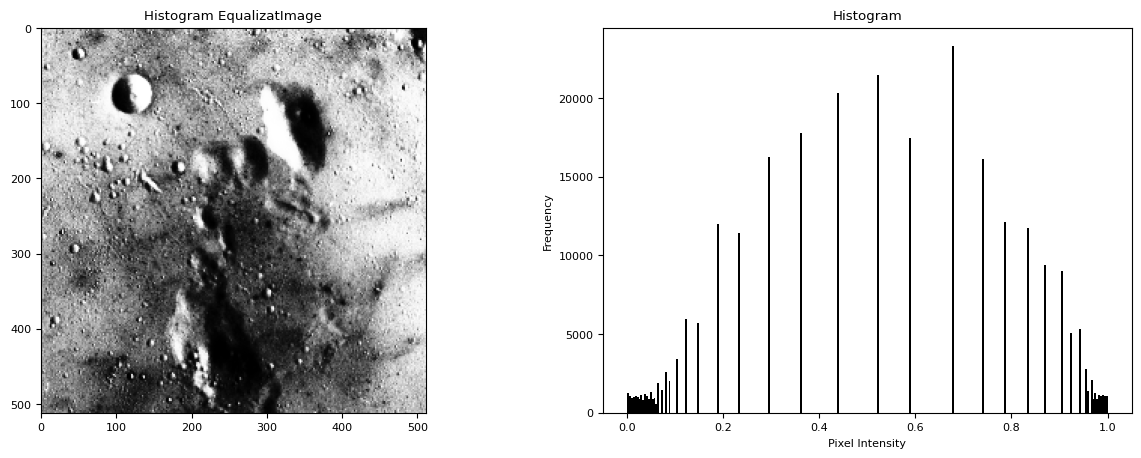

In [69]:
from skimage import exposure

# Apply histogram equalization
img_eq = exposure.equalize_hist(gray_image_low_contrast)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].imshow(img_eq, cmap='gray')
ax[0].set_title('Histogram EqualizatImage')

ax[1].hist(img_eq.ravel(), bins=256, color='k')
ax[1].set_title('Histogram')
ax[1].set_xlabel('Pixel Intensity')
ax[1].set_ylabel('Frequency')

plt.show()

# **Example on** Histogram Equlaization
Histogram Equalization helps in **enchancing contrast**.    
It redistributes the intensity values so that they can span the entire range of possible values.  
Histogram Equalization improves the *global contrast* but that doesn't mean it performs will with all images.  

Given a simple image that is represented in 8 intensity level (0 to 7) as the following table shows, we will perform histogram equalization on this image.  

|Intensity Level $r_k$|0|1|2|3|4|5|6|7|Total $N$|
|---------------------|-|-|-|-|-|-|-|-|---------|
|Frequency $n_k$      |0|0|10|10|20|20|4|0|64|

**Solution**  
**Step 1** Compute the *Probability Density Function* (PDF) using the following formula: $p_k = \frac{n_k}{N}$.
|$r_k$|0|1|2     |3     |4     |5     |6     |7|
|-----|-|-|------|------|------|------|------|-|
|$n_k$|0|0|10    |10    |20    |20    |4     |0|
|$p_k$|0|0|0.1562|0.1562|0.3125|0.3125|0.0625|0|

```Python
import numpy as np

r_k = np.linspace(1,8,8)
n_k = np.array([0, 0, 10, 10, 20, 20, 0]) # Hard coded
N = np.sum(n_k) # Output: 64
p_k = n_k / N # Output: array([0.     , 0.     , 0.15625, 0.15625, 0.3125 , 0.3125 , 0.0625 , 0.     ])
```
**Step 2** Compute the *Commulative Density Function* (CDF) using the following formula: $s_k = \sum_{j=0}^{K}{p_j}$
| $r_k$|0|1|2|3|4|5|6|7|
|-----|-|-|-|-|-|-|-|-|
|$n_k$ |0|0|10|10|20|20|4|0|
|$p_k$ |0|0|0.1562|0.1562|0.3125|0.3125|0.0625|0|
|$s_k$ |0|0|0.1562|0.3125|0.625|0.9375|1|1|

```Python
s_k = np.cumsum(p_k) # Output: array([0.     , 0.     , 0.15625, 0.3125 , 0.625  , 0.9375 , 1.     ,  1.     ])
```
> CDF must result into 1

